## Bagging Decision Tree Model

In [72]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [76]:
df

,Unnamed: 0,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,947,5698,75,1,1,1,28.145541,0,14.687081,9.362816,...,1,0,2.540361,0,0,0,0,1,1,XXXConfid
2774,1195,5946,65,0,0,2,37.706252,1,5.207424,1.716515,...,1,0,0.069671,0,1,1,0,1,1,XXXConfid
2775,923,5674,60,0,0,3,36.618332,0,17.939241,8.013897,...,0,0,4.218700,1,1,0,0,0,1,XXXConfid
2776,897,5648,78,1,0,2,30.844795,1,10.518349,8.760165,...,1,0,1.419698,0,1,0,0,0,1,XXXConfid


Diagnois was imblanced so it use the excel data_oversampling file to be balanced. 

In [82]:
df.drop(['DoctorInCharge'], axis=1, inplace=True)

In [84]:
#features =["FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems","SleepQuality", "EducationLevel", "FamilyHistoryAlzheimers", "Depression", "BMI"]
target = "Diagnosis"

### How to Build Model
- For each n, create n bootstrap samples
- Train n decision trees
- Combine their predictions using majority voting
- Evaluate on the test set

### Building Model

- Use 80% of data to train the model and 20% to test it to evaluate how the model perform in unseen data.
- More trees might reduce overfitting, but too many might not improve performance much. So, creating the 30 trees to test it.
- Creating Bootstrap samples: each tree get different subset of data and making more essembles and reduce variance.
- Train a weak learner (a single decision tree).Individual trees might not perform great alone, but together, they form a strong model.
- Use majority voting across all trees to get the final prediction. This is the core of Bagging — aggregate weak models for stronger, more stable predictions

### Benefits of Using Bagging with Decision Trees:
- Reduced overfitting
- improved accuracy
- More Robust
- good for imblanced data

In our dataset, trying to predict whether someone has Alzheimer’s or not.
Most of the people in the dataset are healthy, and only a smaller group actually have Alzheimer’s.
Because of that, we call the Alzheimer’s group the minority class — it’s the class with fewer examples.
The healthy group is called the majority class since it has more data points.
This imbalance can be a problem for machine learning models, because they tend to focus more on the majority class and may ignore or misclassify the minority class.
But in this case, the minority class — people with Alzheimer’s — is actually the most important group to detect.
That’s why special techniques, like bagging and class weighting, to help the model better learn from this smaller group and not overlook it.


### Testing with Oversampling Dataset 

In [74]:
df= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/alzheimers_disease_data_oversampled.csv")

In [134]:
x = df.drop(columns=["PatientID", "Diagnosis"])
y = df[target]


In [195]:
counts = df.Diagnosis.value_counts().tolist()
print (counts)

[1389, 1389]


In [237]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

    #ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
    #plt.title("Confusion Matrix – Bagging Model with Decision Trees")
    #plt.show()
    #plt.tight_layout()
    #plt.show()


1 trees → Test Accuracy: 0.9640
Best number of trees: 1 with accuracy 0.9640
2 trees → Test Accuracy: 0.9658
Best number of trees: 2 with accuracy 0.9658
3 trees → Test Accuracy: 0.9658
Best number of trees: 2 with accuracy 0.9658
4 trees → Test Accuracy: 0.9568
Best number of trees: 2 with accuracy 0.9658
5 trees → Test Accuracy: 0.9658
Best number of trees: 2 with accuracy 0.9658
6 trees → Test Accuracy: 0.9622
Best number of trees: 2 with accuracy 0.9658
7 trees → Test Accuracy: 0.9712
Best number of trees: 7 with accuracy 0.9712
8 trees → Test Accuracy: 0.9712
Best number of trees: 7 with accuracy 0.9712
9 trees → Test Accuracy: 0.9694
Best number of trees: 7 with accuracy 0.9712
10 trees → Test Accuracy: 0.9658
Best number of trees: 7 with accuracy 0.9712
11 trees → Test Accuracy: 0.9640
Best number of trees: 7 with accuracy 0.9712
12 trees → Test Accuracy: 0.9712
Best number of trees: 7 with accuracy 0.9712
13 trees → Test Accuracy: 0.9730
Best number of trees: 13 with accuracy 0

Best number of trees: 13 with accuracy 0.9730


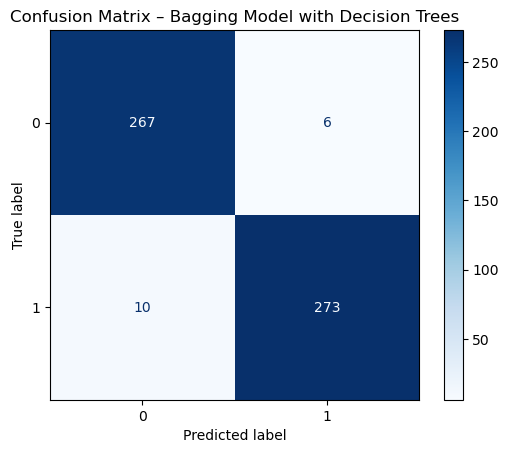

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       273
           1       0.98      0.96      0.97       283

    accuracy                           0.97       556
   macro avg       0.97      0.97      0.97       556
weighted avg       0.97      0.97      0.97       556



In [238]:
best_n = max(results, key=results.get)
print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
plt.title("Confusion Matrix – Bagging Model with Decision Trees")
plt.show()
plt.tight_layout()
plt.show()
print(classification_report(y_test, final_preds))


In [239]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[267   6]
 [ 10 273]]
Accuracy:  0.97
Precision: 0.98
Recall:    0.96
F1 Score:  0.97
False Negative Rate: 0.0353


### Evaluation 

- True Positive (TP) = 273
- True Negative (TN) = 267
- False Positive (FP) = 6
- False Negative (FN) = 10
-
Plot confusion matrix to show how many false positive, false negative, true positive, true negative, especially to know false negative.
- Precision - 98%  - how accurate are positive predition
- Recall - 96% - how many positive case are caught
- F1 score - 97% - balance between precision and recall avoiding false alarm 


### Analysis
By using the oversampling dataset, Alzhimers for 
Using bagging ensemble of decision trees, and the results were very strong. The overall accuracy was 97%, which means the model correctly predicted almost all cases in the test data.
What’s even more important is the recall score of 0.98%. That means it was able to detect almost all true Alzheimer’s cases.
And also, I run the model several times and false negative rate — it was below 5%, so the model rarely missed a case where the patient actually had Alzheimer’s. That tells us the model is not just accurate, but also reliable and sensitive to real cases.
The precision was also high at 98%, meaning that most of the patients predicted to have Alzheimer’s actually did.
Even though used all available features, the model remained very stable. Bagging, it avoided overfitting and stayed robust.
In conclusion, this model shows a strong and balanced performance, and it's well-suited for use in early Alzheimer’s screening.

### Testing Top 5 Features selection cleaned Dataset

In [256]:
df1= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/alzheimers_disease_cleaned.csv")

In [258]:
df1

,MemoryComplaints,BehavioralProblems,MMSE,ADL,FunctionalAssessment,Diagnosis
0,0,0,21.463532,1.725883,6.518877,0
1,0,0,20.613267,2.592424,7.118696,0
2,0,0,7.356249,7.119548,5.895077,0
3,0,1,13.991127,6.481226,8.965106,0
4,0,0,13.517609,0.014691,6.045039,0
...,...,...,...,...,...,...
2144,0,0,1.201190,4.492838,0.238667,1
2145,0,1,6.458060,9.204952,8.687480,1
2146,0,0,17.011003,5.036334,1.972137,1
2147,0,0,4.030491,3.785399,5.173891,1


In [260]:
counts = df1.Diagnosis.value_counts().tolist()
print (counts)

[1389, 760]


In [262]:
features =["FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems"]
target = "Diagnosis"
y = df1[target]
x = df1 [features]

In [266]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        #model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

1 trees → Test Accuracy: 0.8884
Best number of trees: 1 with accuracy 0.8884
2 trees → Test Accuracy: 0.9023
Best number of trees: 2 with accuracy 0.9023
3 trees → Test Accuracy: 0.9442
Best number of trees: 3 with accuracy 0.9442
4 trees → Test Accuracy: 0.9349
Best number of trees: 3 with accuracy 0.9442
5 trees → Test Accuracy: 0.9326
Best number of trees: 3 with accuracy 0.9442
6 trees → Test Accuracy: 0.9419
Best number of trees: 3 with accuracy 0.9442
7 trees → Test Accuracy: 0.9419
Best number of trees: 3 with accuracy 0.9442
8 trees → Test Accuracy: 0.9419
Best number of trees: 3 with accuracy 0.9442
9 trees → Test Accuracy: 0.9488
Best number of trees: 9 with accuracy 0.9488
10 trees → Test Accuracy: 0.9488
Best number of trees: 9 with accuracy 0.9488
11 trees → Test Accuracy: 0.9442
Best number of trees: 9 with accuracy 0.9488
12 trees → Test Accuracy: 0.9442
Best number of trees: 9 with accuracy 0.9488
13 trees → Test Accuracy: 0.9442
Best number of trees: 9 with accuracy 0.

Best number of trees: 14 with accuracy 0.9535


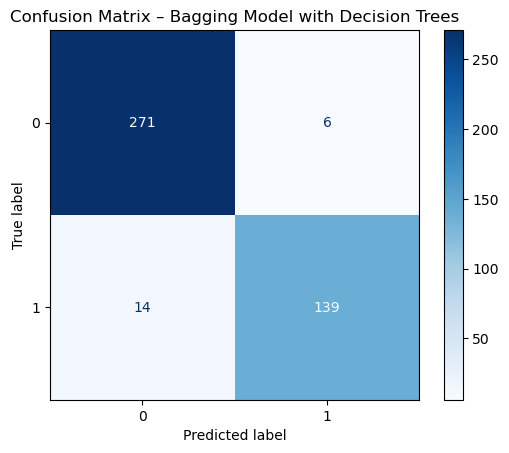

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [273]:
 best_n = max(results, key=results.get)
 print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

 ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
 plt.title("Confusion Matrix – Bagging Model with Decision Trees")
 plt.show()
 plt.tight_layout()
 plt.show()
print(classification_report(y_test, final_preds))

In [275]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[271   6]
 [ 14 139]]
Accuracy:  0.95
Precision: 0.96
Recall:    0.91
F1 Score:  0.93
False Negative Rate: 0.0915


### Evaluation 

- True Positive (TP) = 139
- True Negative (TN) = 271
- False Positive (FP) = 6
- False Negative (FN) = 14
- Precision - 96%  - how accurate are positive predition
- Recall - 91% - how many positive case are caught
- F1 score - 93% - balance between precision and recall avoiding false alarm 

### Testing all features ( Excluded - Doctor In charge)

In [282]:
df2= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/alzheimers_disease_data.csv")

In [284]:
df2

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [286]:
counts = df2.Diagnosis.value_counts().tolist()
print (counts)

[1389, 760]


In [290]:
target = "Diagnosis"
x = df2.drop(columns=["Diagnosis", "DoctorInCharge"])
y = df2[target]

In [343]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        #model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        model_weighted = DecisionTreeClassifier(max_depth=15,class_weight='balanced',random_state=42)
        #model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
    

1 trees → Test Accuracy: 0.9233
Best number of trees: 1 with accuracy 0.9233
2 trees → Test Accuracy: 0.9442
Best number of trees: 2 with accuracy 0.9442
3 trees → Test Accuracy: 0.9674
Best number of trees: 3 with accuracy 0.9674
4 trees → Test Accuracy: 0.9558
Best number of trees: 3 with accuracy 0.9674
5 trees → Test Accuracy: 0.9605
Best number of trees: 3 with accuracy 0.9674
6 trees → Test Accuracy: 0.9535
Best number of trees: 3 with accuracy 0.9674
7 trees → Test Accuracy: 0.9558
Best number of trees: 3 with accuracy 0.9674
8 trees → Test Accuracy: 0.9512
Best number of trees: 3 with accuracy 0.9674
9 trees → Test Accuracy: 0.9605
Best number of trees: 3 with accuracy 0.9674
10 trees → Test Accuracy: 0.9605
Best number of trees: 3 with accuracy 0.9674
11 trees → Test Accuracy: 0.9581
Best number of trees: 3 with accuracy 0.9674
12 trees → Test Accuracy: 0.9628
Best number of trees: 3 with accuracy 0.9674
13 trees → Test Accuracy: 0.9605
Best number of trees: 3 with accuracy 0.

Best number of trees: 20 with accuracy 0.9721


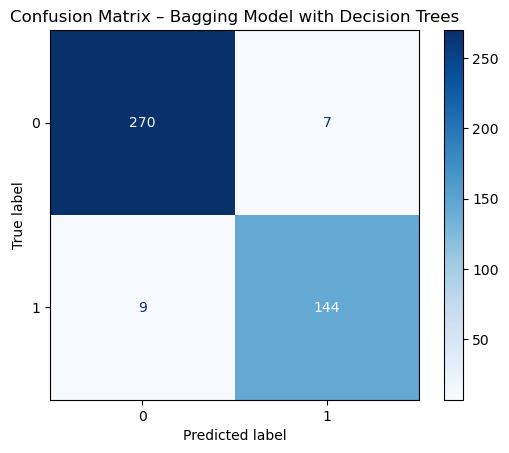

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       277
           1       0.95      0.94      0.95       153

    accuracy                           0.96       430
   macro avg       0.96      0.96      0.96       430
weighted avg       0.96      0.96      0.96       430



In [344]:
best_n = max(results, key=results.get)
print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
plt.title("Confusion Matrix – Bagging Model with Decision Trees")
plt.show()
plt.tight_layout()
plt.show()
print(classification_report(y_test, final_preds))

In [345]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[270   7]
 [  9 144]]
Accuracy:  0.96
Precision: 0.95
Recall:    0.94
F1 Score:  0.95
False Negative Rate: 0.0588


### Evaluation
- True Positive (TP) = 146
- True Negative (TN) = 271
- False Positive (FP) = 6
- False Negative (FN) = 7
- Precision - 96% - how accurate are positive predition
- Recall - 91% - how many positive case are caught
- F1 score - 93% - balance between precision and recall avoiding false alarm

### Overall Analysis

The best overall performance came from the model trained on the oversampled dataset, achieving approximately 97% accuracy and a very low false negative rate (below 5%). This model proved to be the most effective at identifying true Alzheimer’s cases.
The model trained using all features also performed very well, with 96% accuracy, and had a lower false negative rate compared to the model using only the top 5 selected features. Surprisingly, when using all features, the model actually performed even better — especially in reducing false negatives.  
I assume that using all features, along with balanced class weights and controlled tree splitting, helped improve the model’s accuracy.
Overall, combining oversampling, feature selection, and bagging with bootstrapping produced consistently strong and reliable results — making the model suitable for early Alzheimer’s detection.